In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/used-car-dataset-ford-and-mercedes/unclean focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/bmw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/merc.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/hyundi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/focus.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vauxhall.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/unclean cclass.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/vw.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/audi.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/ford.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/skoda.csv
/kaggle/input/used-car-dataset-ford-and-mercedes/toyota.csv


In [2]:
import plotly.express as ply
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('../input/used-car-dataset-ford-and-mercedes/bmw.csv')   


CHECK for NULL and NAN values

In [4]:
df.isnull().any().sum()

0

In [5]:
df.isna().any().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


As seen we have Model,Transmission type, Fuel type is object for which we have to convert these categorical values into int.We will use Label Encoding technique for this later.For now lets lokk at the unique values in those categorical features.

In [7]:
df['model'].unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

In [8]:
df['transmission'].unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [9]:
df['fuelType'].unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric'], dtype=object)

## Exploratory Data Analysis

Checkong the correlation of all the features using heatmap.

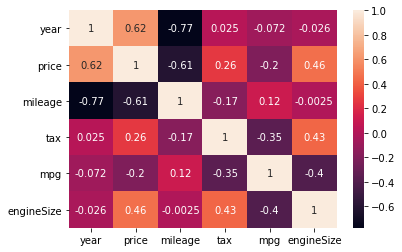

In [10]:
corr_=df.corr()
sns.heatmap(corr_,annot=True)

Looking at the different models and their values

Text(0.5, 1.0, 'Model')

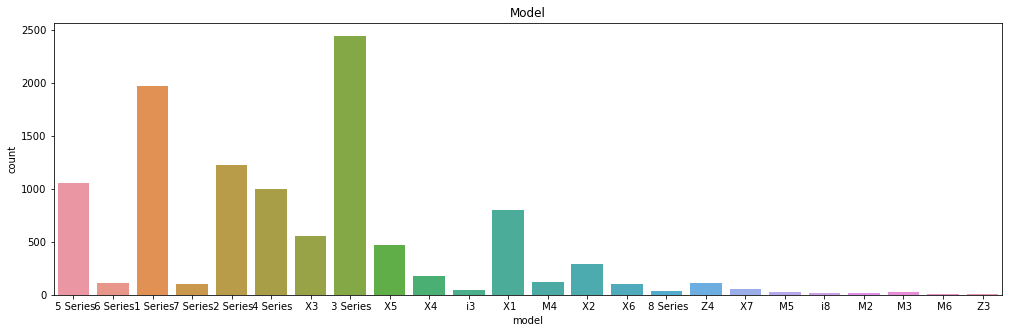

In [11]:
plt.figure(figsize=(17,5))
sns.countplot(df['model'])
plt.title('Model')

### Pie Chart

In [12]:
df_ser_=df.model.value_counts()
df_ser=pd.DataFrame(df_ser_)
labels=df['model'].unique()
sizes=df_ser['model']

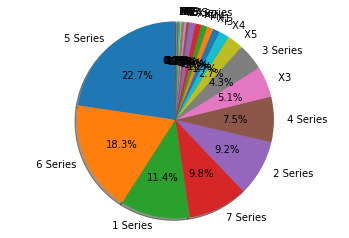

In [13]:
fig1,ax1=plt.subplots()
ax1.pie(sizes,explode=None,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal')
plt.show()

### Cars with different fuel type

Text(0.5, 1.0, 'Fuel Type')

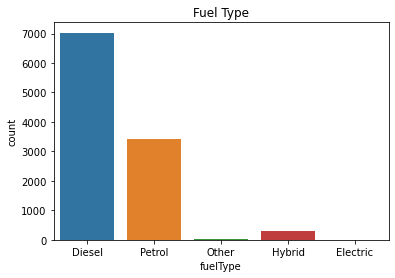

In [14]:
sns.countplot(df['fuelType'])
plt.title('Fuel Type')

### Cars with different Transmission type

Text(0.5, 1.0, 'Transmission type')

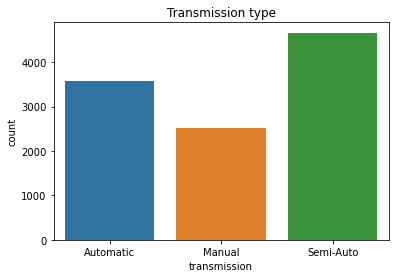

In [15]:
sns.countplot(df['transmission'])
plt.title('Transmission type')

### Cars with different Enigine Size

Text(0.5, 1.0, 'Engine Size')

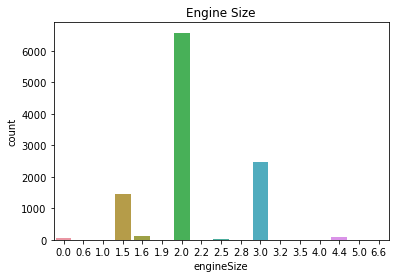

In [16]:
sns.countplot(df['engineSize'])
plt.title('Engine Size')

### Model Vs Price

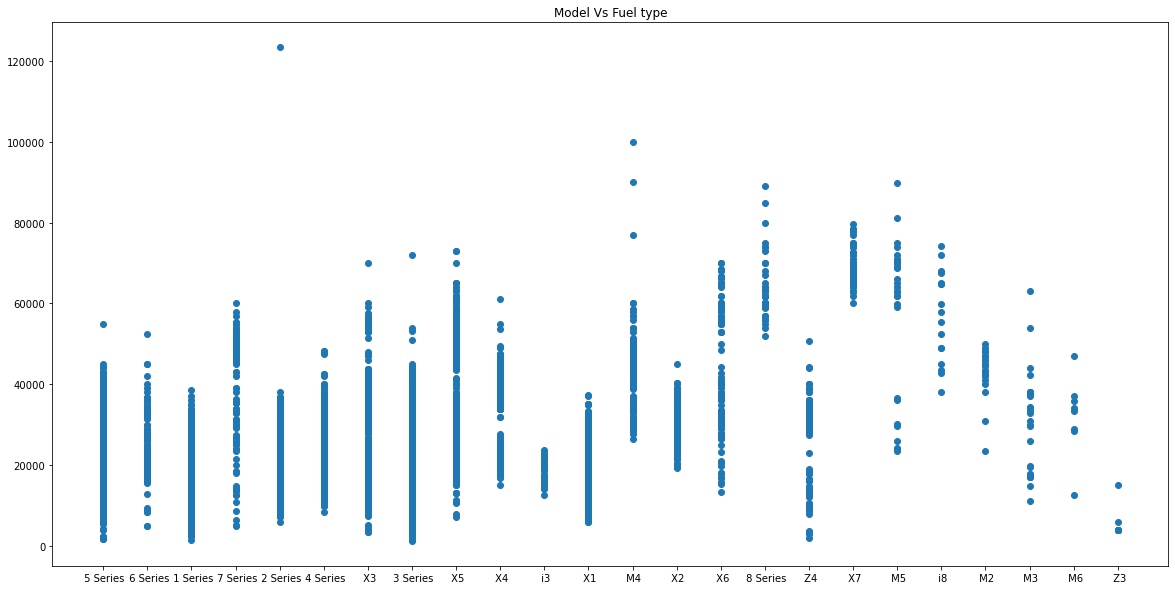

In [17]:
plt.figure(figsize=(20,10))
plt.scatter(df['model'],df['price'])
plt.title('Model Vs Fuel type')
plt.show()

### Engine size Vs Miles Per Gallon

<Figure size 3600x2160 with 0 Axes>

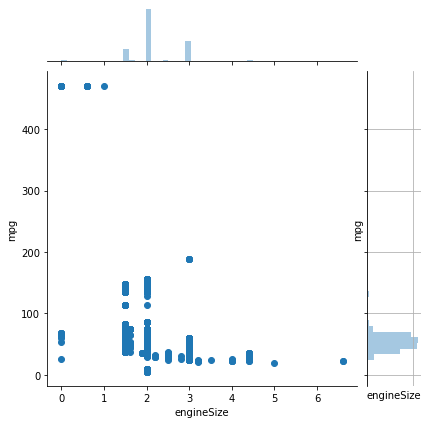

In [18]:
plt.figure(figsize=(50,30))
sns.jointplot(x='engineSize',y='mpg',data=df)
plt.xlabel('engineSize')
plt.ylabel('mpg')
plt.grid()
plt.show()

### Fuel type Vs MPG

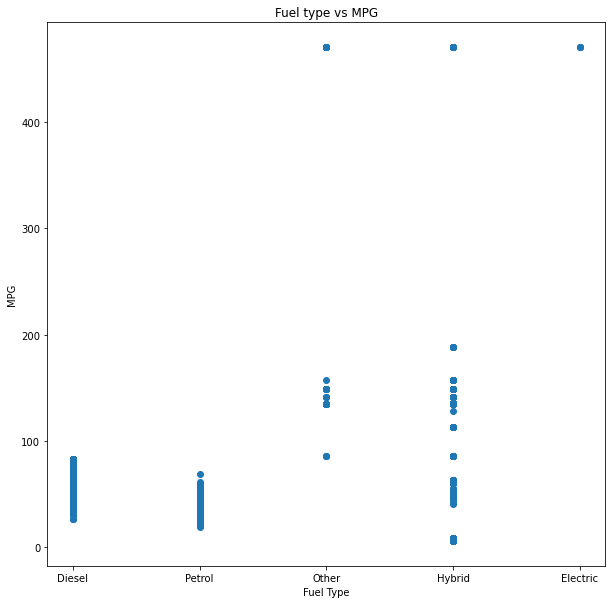

In [19]:
plt.figure(figsize=(10,10))
plt.scatter(df['fuelType'],df['mpg'])
plt.xlabel('Fuel Type')
plt.ylabel('MPG')
plt.title('Fuel type vs MPG')
plt.show()

### Model Vs MPG

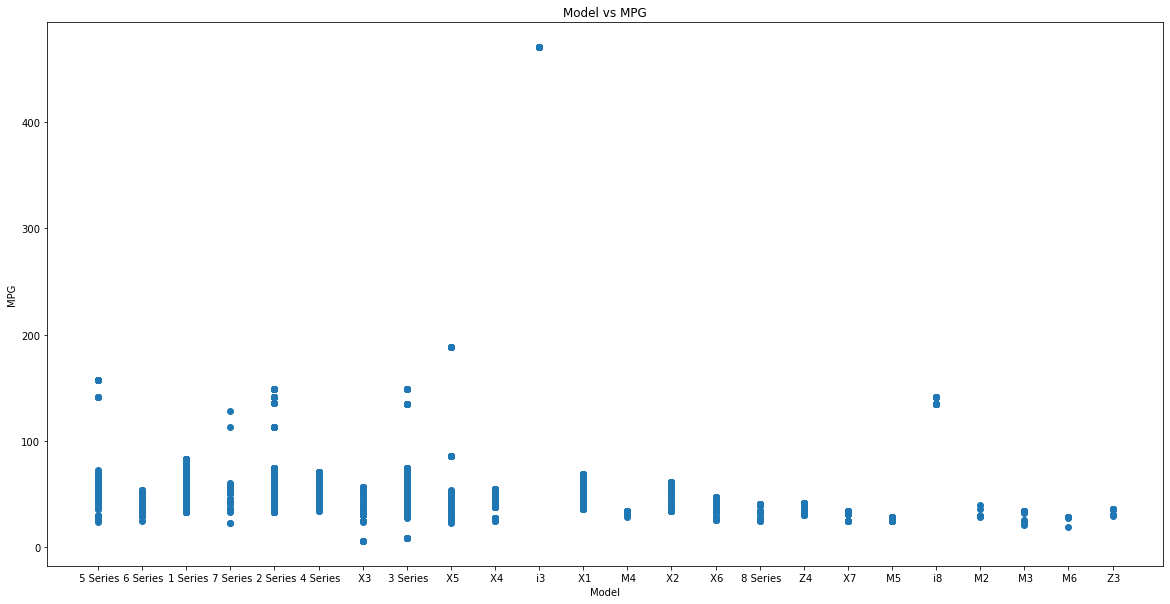

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(df['model'],df['mpg'])
plt.xlabel('Model')
plt.ylabel('MPG')
plt.title('Model vs MPG')
plt.show()

### Model Vs Transmission

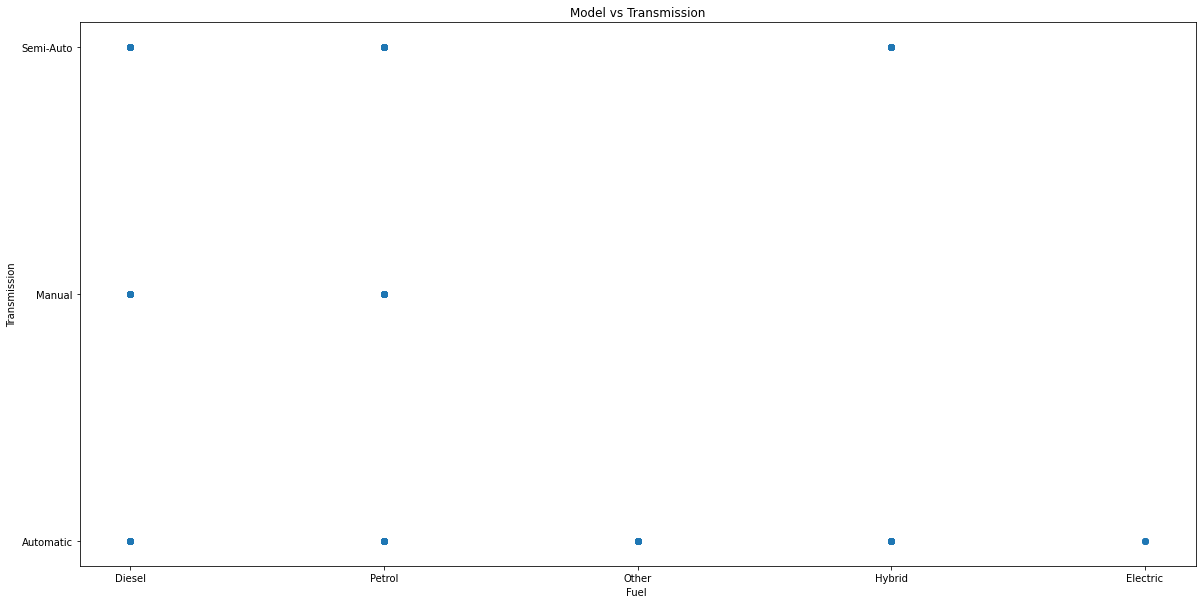

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(df['fuelType'],df['transmission'])
plt.xlabel('Fuel ')
plt.ylabel('Transmission')
plt.title('Model vs Transmission')
plt.show()

### Tax Vs Model

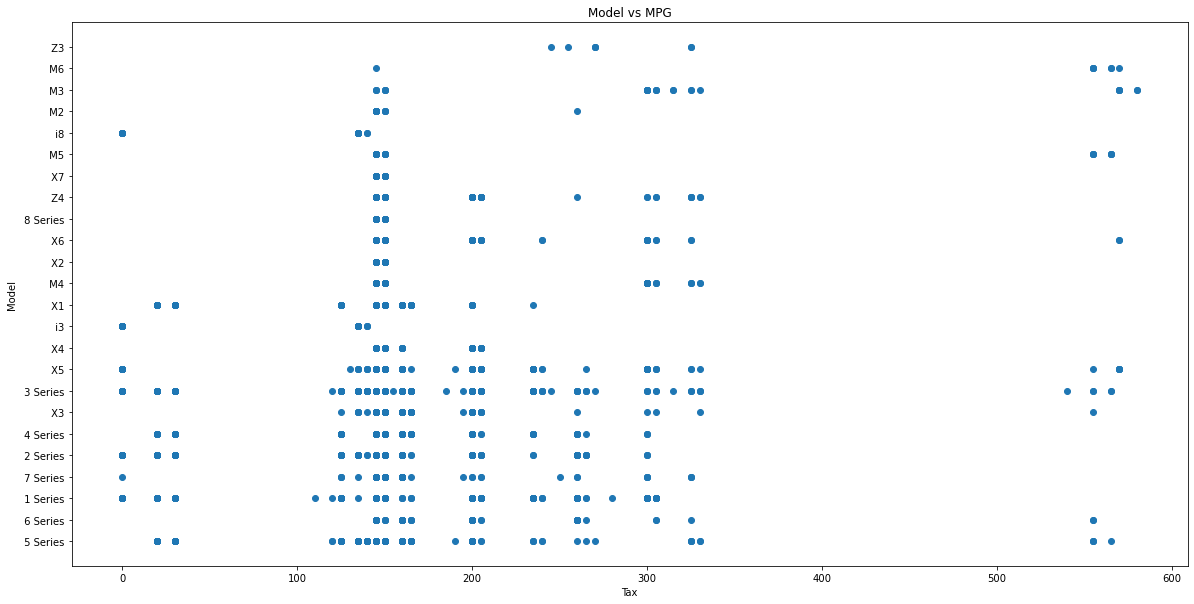

In [22]:
plt.figure(figsize=(20,10))
plt.scatter(df['tax'],df['model'])
plt.xlabel('Tax')
plt.ylabel('Model')
plt.title('Model vs MPG')
plt.show()

As we have seen different graphs explaining relationships between different variables.Let us now Encode the Categorical variable using Label Encode.We can also plot different graphs by taking different parameters from the data.We can dive deep into the data more by using .groupby() method and grouping the models based on years and other parameters/attributes.

In [23]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [24]:
df['model']=LE.fit_transform(df['model'])
df['fuelType']=LE.fit_transform(df['fuelType'])
df['transmission']=LE.fit_transform(df['transmission'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  int64  
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  int64  
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  int64  
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 758.2 KB


As one can see in the info() the categorical columns have now been encoded and dtype has been changed to int64 from object which makes it easier for us and to the model to perform operations on it.

Selecting Features i.e Dependent and independent variables for prediction

In [26]:
features=['model','year','transmission','mileage','fuelType','tax','mpg','engineSize']

In [27]:
X=df[features]
Y=df['price']

### Splitting the data

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

Having splited the data into Train and Test categories,we will apply Linear Regression 

In [29]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
lr=LR.fit(X_train,Y_train)
pred=lr.predict(X_test)

## Preformance metrics

In [30]:
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
print('R-Squared: ',r2_score(Y_test,pred)*100)

R-Squared:  74.08589613137696


In [32]:
vals=pd.DataFrame({'Predicted':pred,'Actual':Y_test})
vals

,Predicted,Actual
3840,32656.125987,35470
7757,21808.053706,15490
10325,19315.809973,17000
685,8399.946589,10991
1947,26386.808864,21050
...,...,...
6087,34053.532716,31992
4895,20286.364245,18690
5649,27845.669103,21890
963,14306.385281,14298


As one can see that the accuracy is around 74%,it is highly recomended to optimize the parameters or to implement the other regression techniques to get better accuracy.Now I'll with Ridge regression and ElasticNet which is the combination of Ridge and Lasso Regressions.

Ridge is a L2 norm where it distributes the coefficients across all the features.

In [33]:
from sklearn.linear_model import Ridge,ElasticNet
ridge=Ridge(alpha=2,max_iter=1000)

In [34]:
ridge.fit(X_train,Y_train)

Ridge(alpha=2, max_iter=1000)

In [35]:
Ridge_predict=ridge.predict(X_test)

In [36]:
ridge.score(X_test,Y_test)*100 

74.0890485514345

Ridge havent shown better accuracy than the Linear Regression.Lets try with Elastic Net.

In [37]:
EN=ElasticNet(alpha=1,l1_ratio=1.001,max_iter=1000)
EN.fit(X_train,Y_train)

ElasticNet(alpha=1, l1_ratio=1.001)

In [38]:
EN_pred=EN.predict(X_test)

In [39]:
EN.score(X_test,Y_test)*100

74.07574565877633

Even the elastic net haven't given us the good enough result when compared to that of Linear and Ridge Regressions.Lets try with Gradient boosting and  Extreme Gradient Booosting algorithims.

Boosting algorithims comes in first place when one think of either regression or classification problems.Since it's introduction in '04 's it has become popular among Data Science enthusiasts and Data Scientists because of its accurate implementations and computing capability od boosting tree algorithms.

### Gradient Boosting Regression

In [40]:
from sklearn.ensemble import GradientBoostingRegressor

In [41]:
GB=GradientBoostingRegressor(random_state=0)
GB.fit(X_test,Y_test)

GradientBoostingRegressor(random_state=0)

In [42]:
GB_pred=GB.predict(X_test)
GB_pred

array([31000.04239069, 18129.95894368, 18239.9049809 , ...,
       20645.78215075, 14981.9611592 , 21980.968581  ])

## Score of Gradient Boosting

In [43]:
print('Performance Score(GB): ',GB.score(X_test,Y_test)*100)

Performance Score(GB):  95.0394800061585


Bammm!!!!!!! Finally satiisfactory results.Lets check with Extreme Gradient Boosting(XGB) also.

In [44]:
from xgboost import XGBRegressor
XGB=XGBRegressor()
XGB.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
XGB_pred=XGB.predict(X_test)

## Score

In [46]:
print('performance score(XGB): ',XGB.score(X_test,Y_test)*100) 

performance score(XGB):  95.13950079394851


Print the values for both Gradient Boosting and XGB 

In [47]:
#For XGB
values=pd.DataFrame({'Predicted':XGB_pred,'Actual':Y_test})
values

,Predicted,Actual
3840,34243.839844,35470
7757,17131.724609,15490
10325,17532.144531,17000
685,14484.118164,10991
1947,21253.283203,21050
...,...,...
6087,30824.957031,31992
4895,19712.541016,18690
5649,22136.527344,21890
963,16719.234375,14298


In [48]:
#For GB
values=pd.DataFrame({'Predicted':GB_pred,'Actual':Y_test})
values

,Predicted,Actual
3840,31000.042391,35470
7757,18129.958944,15490
10325,18239.904981,17000
685,11091.344260,10991
1947,20631.454879,21050
...,...,...
6087,29991.899046,31992
4895,20034.392654,18690
5649,20645.782151,21890
963,14981.961159,14298


In [49]:
print('Linear Regression accuracy score: ',r2_score(Y_test,pred)*100)
print('Ridge Regression accuracy score: ',ridge.score(X_test,Y_test)*100 )
print('Elastic_Net Regression accuracy score: ',EN.score(X_test,Y_test)*100)
print('Gradient_Boosting Regression accuracy score: ',GB.score(X_test,Y_test)*100)
print('XGB Regression accuracy score: ',XGB.score(X_test,Y_test)*100)

Linear Regression accuracy score:  74.08589613137696
Ridge Regression accuracy score:  74.0890485514345
Elastic_Net Regression accuracy score:  74.07574565877633
Gradient_Boosting Regression accuracy score:  95.0394800061585
XGB Regression accuracy score:  95.13950079394851


Finally!...We have managed to achive a 95% score with Gradient Boosting and XGB(extreme Gradient Boosting) algorithms.As always my first choise was GB and XGB however to show-up the problem with different regression algorithims I have used 'Linear Regression','Ridge Regression'(ps note: Could have tried with Lasso Regression also),'Elastic Net','Gradient Boosting','XGBoosting'.